# Plotting for Exploratory data analysis (EDA)

## Haberman dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

#### Attribute Information:

Age of patient at time of operation (numerical)


Patient's year of operation (year - 1900, numerical)


Number of positive axillary nodes detected (numerical)


Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None


In [1]:
#!pip install seaborn
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
hb = pd.read_csv("haberman.csv")


hb.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [2]:
# (Q) how many data-points and features?
print (hb.shape)

(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#(or) How many different axillary nodes are present?

hb["nodes"].value_counts()

#observation:
#Mosltly nodes number are below 10

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [5]:
#(Q) How many data points for each status class are present? 
hb["status"].value_counts()
#observation:
#There are two survival status 
#the patient survived 5 years or longer ; 2 = the patient died within 5 year 
#More number of patients have survived 5 years or longer

1    225
2     81
Name: status, dtype: int64

#  2-D Scatter Plot

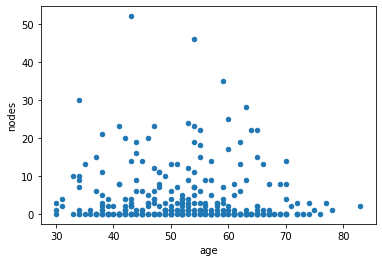

In [6]:
#2-D scatter plot:

hb.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-survival status.

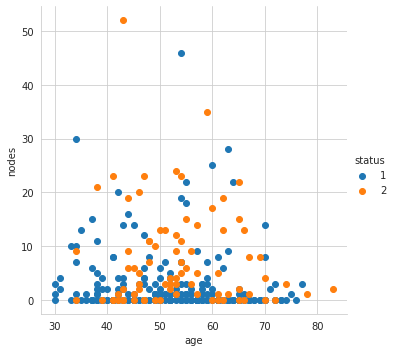

In [7]:
# 2-D Scatter plot with color-coding for each survial class.

sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

# This is also does not give proper outcome of how age related to survival status or number of nodes

**Observation(s):**
1. This is also does not give proper outcome of how age is related to survival status or number of nodes


#  Pair-plot

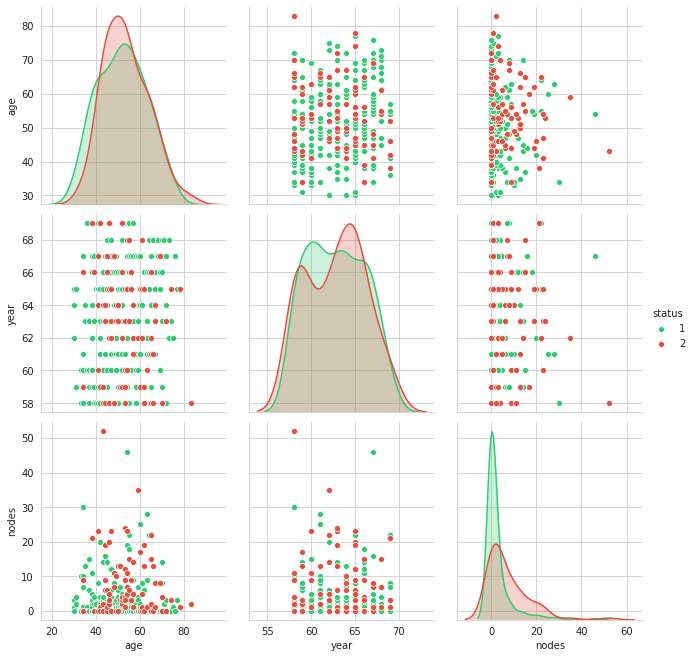

In [8]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
flatui = ["#2ecc71", "#e74c3c", "#9b59b6", "#3498db", "#95a5a6", "#34495e"]
#sns.palplot(sns.color_palette(flatui))
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=3,palette=sns.color_palette(flatui));
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. nodes vs age is a better comparision that other comparisions
2. We can observe that people who have mean node value=0 have mostly survived more than 5 years

# Histogram, PDF, CDF

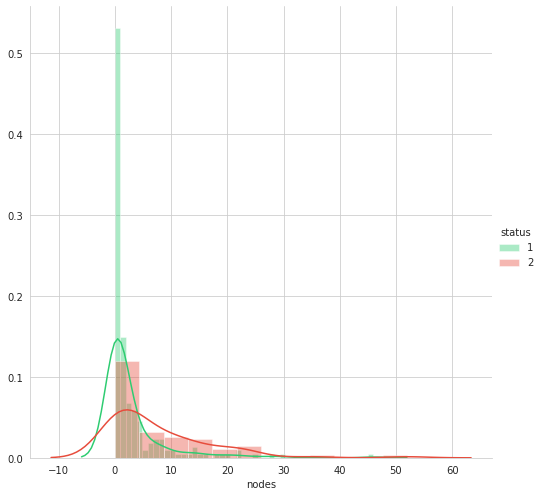

In [9]:

sns.FacetGrid(hb, hue="status", height=7,palette=sns.color_palette(flatui)) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();



***observations***:
1. most of the people lived more than 5 years if the no of nodes is close lto zero

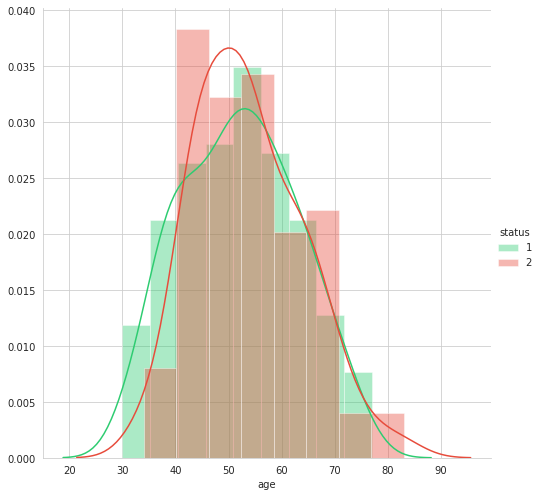

In [10]:
sns.FacetGrid(hb, hue="status", height=7,palette=sns.color_palette(flatui)) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

***observation***:
1. No clear observation available from this distibution

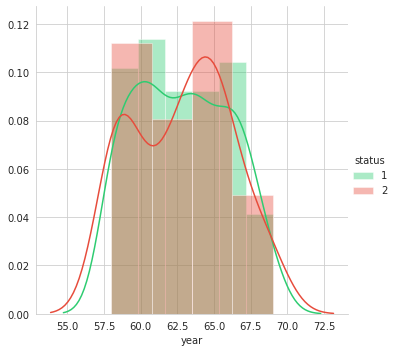

In [11]:
sns.FacetGrid(hb, hue="status", height=5,palette=sns.color_palette(flatui)) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

***observation***:
1. No clear observation available from this distibution

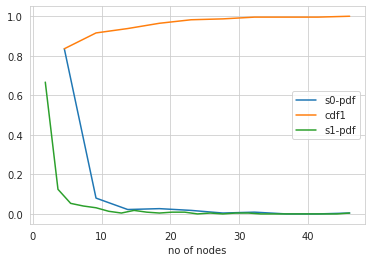

In [12]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
class_1=hb[hb["status"]==1]
class_2=hb[hb["status"]==2]

counts, bins = np.histogram(class_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bins);
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf,label="s0-pdf");
plt.plot(bins[1:], cdf,label="cdf1")


counts, bins = np.histogram(class_1['nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bins[1:],pdf,label="s1-pdf");
plt.legend()
plt.xlabel("no of nodes")
plt.show();


***observation***:
1. As we increase the no of bins data was more aligned towatds zero for this data
2. 95% of the people have less than 20 nodes and 90% people have less than 10 nodes.

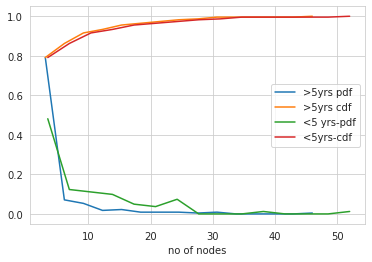

In [13]:
counts, bins = np.histogram(class_1['nodes'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bins);
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf,label=">5yrs pdf");
plt.plot(bins[1:], cdf,label=">5yrs cdf")

counts1, bins1 = np.histogram(class_2['nodes'], bins=15, 
                                 density = True)
pdf1 = counts1/(sum(counts1))
cdf = np.cumsum(pdf)
plt.plot(bins1[1:],pdf1,label="<5 yrs-pdf");
plt.plot(bins1[1:],cdf,label="<5yrs-cdf");
plt.legend()
plt.xlabel("no of nodes")
plt.show();


***observation***:
1. At around 2.5 nodes, probability of people who survived is more than who died.
2. hence, no nodes is one of the important feature to distinguish deaths.

# Box plot and Whiskers

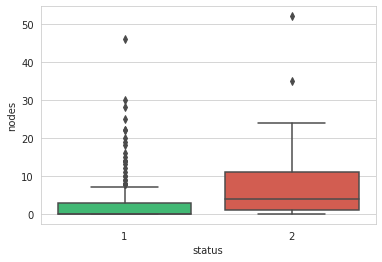

In [14]:
sns.boxplot(x='status',y='nodes', data=hb,palette=sns.color_palette(flatui))
plt.show()

***observation***:
1. here also it is evident that people who survived has less nodes than 3.

#  Violin plots

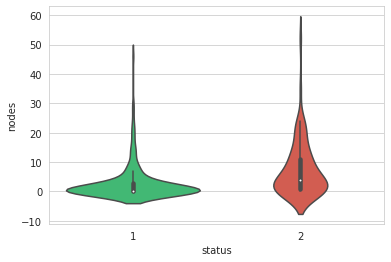

In [15]:
sns.violinplot(x="status", y="nodes", data=hb, height=8,palette=sns.color_palette(flatui))
plt.show()

***observation***:
1. here also it is evident that people who survived has less nodes than 3 same as above

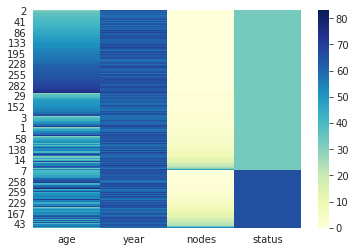

In [16]:
#class_2=class_2.pivot('status','nodes')
#hb1=hb[['status','nodes']].sort_values(by='nodes')
hb1=hb.sort_values(['status','nodes'])
hb1['status'] = hb1['status'].apply(lambda x: x *33)
ax = sns.heatmap(hb1,cmap="YlGnBu")

***observation***:
1.Tried to get some information with heat map but not useful.

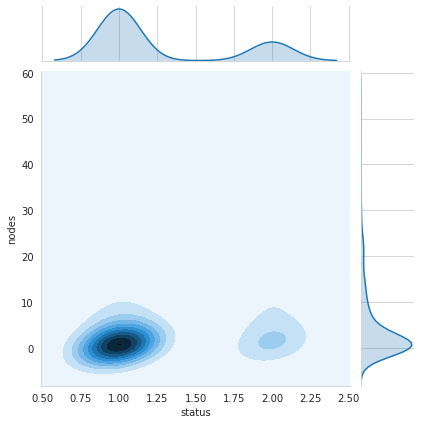

In [17]:
#2D Density plot, contors-plot
sns.jointplot(x="status", y="nodes", data=hb, kind="kde");
plt.show();


***conclusion***:
1. Although we have plotted all feature against each other, we could not get to an assured conclusion.
2. only take away from this analysis is that rate of survival(>5yrs) is high when no of nodes they have is close to 2.5-2.75.
3. More data about nodes and ages would be benificial for further deep dive.